<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 0 - Libraries</p>

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">0.1 - Preprocessing</p>

In [68]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler 

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">0.2 - Plotting</p>

In [69]:
import altair as alt
import matplotlib.pyplot as plt

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">0.3 - Metrics</p>

In [70]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.dummy import DummyClassifier

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">0.4 - Classification Algorithms</p>

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">0.5 - Nested Cross Validation</p>

In [72]:
from sklearn.model_selection import cross_validate, GridSearchCV, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.pipeline import Pipeline

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">0.6 - Miscellaneous</p>

In [73]:
import joblib
import time

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 1 - Story</p>

Spotify provides streaming access to digital music and podcasts from creators across the globe. Regardless of the occasion, whether driving, exercising, or relaxing, you are sure to find the perfect podcast or music to accompany you. The choice is yours as to whether you decide on what you wish to listen to or to allow Spotify to surprise you. Data Science is the primary contributor to the surprise element of this experience.

As part of my role, I participate in personalized content efforts, driving user retention. My current research centers around the development of music feature-based machine learning models. In the context of the recent project, a related classification problem was introduced, whereby music features are to be categorized as user feedback signals expressed as likes or dislikes.

Accordingly, experiments are to be conducted in search of a suitable classifier. Therefore, "KNeighbors" (kNN), "Decision Trees" (DTs), and "Support Vector Machines" (SVMs) are explored for their performance in the context of the classification problem. These potentially high-quality categorizations yield user feedback signals. With insight into potential user feedback signals, recommendations can be drawn as to which music resonates and which does not, stimulating user engagement and thus retention.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 2 - The Data</p>

The following section describes the dataset considered for the classification experiment. More specifically, it will be outlined as to what it consists of and how it might fit within the context of the experiment. Should the dataset appear to be valid according to that outline, it will be read.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">2.1 - Features</p>

<center>

|Feature|Description|Value Range|
|:----:|:----:|:----:|
|Unnamed: 0|Additional index for user feedback signals.|0 to 2016|
|acousticness|Balance between natural sonic and electronic elements.|0.0 to 1.0|
|danceability|Conduciveness to physical engagement.|0.0 to 1.0|
|duration_ms|Length in milliseconds.|0 to +&infin;|
|energy|Invigorating influence on human mood.|0.0 to 1.0|
|instrumentalness|Ratio of instrumental to vocal elements.|0.0 to 1.0|
|key|Tonal center, as a reference point for pitches.|0 to 11|
|liveness|Attendance of an audience.|0.0 to 1.0|
|loudness|Volume in decibels.|-&infin; to 0|
|mode|Musical scale denoting melodic and harmonic structure, nuanced from minor to major.|0 or 1|
|speechiness|Presence of spoken vocals.|0.0 to 1.0|
|tempo|Speed in beats per minute.|0 to +&infin;|
|time_signature|Number of beats (stress points) contained within each measure (bar).|1 to 5|
|valence|Sentimental influence on human mood, nuanced from negative to positive.|0.0 to 1.0|
|target|User feedback signal, referred to as dislike or like.|0 or 1|
|song_title|Name of a song.|&infin;|
|artist|Name of the creator of a song.|&infin;|

</center>

<center>

<em>__[Source](https://www.kaggle.com/datasets/geomack/spotifyclassification)__</em>

</center>

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">2.2 - Experiment Context</p>

The dataset pertains to Spotify's music streaming vertical. It is comprised of with feedback signal user-marked observations, expressed as songs. Columns define song features, while rows represent song resonances.

In light of the music features, input features, for pattern and relationship recognition, required for the project may be available. Given that these are features of "music", the requirement for the music vertical is satisfied. Moreover, user feedback labelled observations, posing targets, are at disposal, enabling classification algorithms. This provides a sound base upon which to develop machine learning models, solving the desired classification problem.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">2.3 - Loading Dataset</p>

In [74]:
df = pd.read_csv("data.csv")

In this cell, the dataset relevant to the classification experiment is entered as "df".

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 3 - IDA</p>

In the following code block, a foundation is laid for subsequent explanatory analysis and preprocessing of the labeled song dataset. Hence, a comprehensive overview of its structural, qualitative, and statistical properties is to be established.

In [75]:
def initial_data_analysis(df):
    print(f"dataset overview:")
    display(df.head(8))

    print(f"\n\n")
    for i, j in zip(["dataset", "target"], [df.iloc[:, :-1], df.iloc[:, -1]]):
        print(f"{i} type: \n{type(j)}")
        print(f"{i} shape: \n{j.shape}\n")

    print(f"\n\ncolumn information:")
    for i in range(0, len(df.columns)):
        print(f"{i:>2}. column: {df.columns[i]:<22} | missing values: {df[df.columns[i]].isna().sum(axis = 0):<7} | {df.dtypes[i]}")

    return

In [76]:
initial_data_analysis(df)

dataset overview:


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega





dataset type: 
<class 'pandas.core.frame.DataFrame'>
dataset shape: 
(2017, 16)

target type: 
<class 'pandas.core.series.Series'>
target shape: 
(2017,)



column information:
 0. column: Unnamed: 0             | missing values: 0       | int64
 1. column: acousticness           | missing values: 0       | float64
 2. column: danceability           | missing values: 0       | float64
 3. column: duration_ms            | missing values: 0       | int64
 4. column: energy                 | missing values: 0       | float64
 5. column: instrumentalness       | missing values: 0       | float64
 6. column: key                    | missing values: 0       | int64
 7. column: liveness               | missing values: 0       | float64
 8. column: loudness               | missing values: 0       | float64
 9. column: mode                   | missing values: 0       | int64
10. column: speechiness            | missing values: 0       | float64
11. column: tempo                  | missing va

In [77]:
df_test = df.reset_index()
df_test["index"].equals(df_test["Unnamed: 0"])

True

Initial data analysis shows that each observation is accompanied by a label, given an equal number of rows for features and targets. Furthermore, "NaN" values do not appear in the dataset. Feature data types within that dataset exhibit meaningful data typing. There is, however, a feature called "Unnamed: 0", redundant to the index.

In [78]:
df.iloc[:, 1:-3].describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000


As viewed from the perspective of descriptive statistics, features appear within non-alarming ranges as analyzed from diverse scopes such as count, mean, standard deviation, minimum, quantiles, and maximum. 

In [79]:
df[df.duplicated(subset = ["song_title", 
                           "artist"],
                 keep = False)].groupby(["song_title", 
                                         "artist"]).size().shape[0]

34

A review of the dataset revealed 34 redundant observations. Duplicates are identified based on similarities among the features "song_title" and "artist". The choice fell on those features, as these are distinct in their combination, unlike scores represented by the other features, given that artists tend to distinguish their songs by different titles. While it is certainly possible that songs by different artists may receive the same score. Both of these features are also only considered to exclude outdated instances of a song, as reuploaded songs are reevaluated, and may pose slight inconsistencies in scores, such that they no longer appear as duplicates.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 4 - EDA, Preprocessing</p>

By means of the following code block, the dataset is explored and prepared for use in subsequent experiments.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">4.1 - Exploratory Data Analysis</p>

In [80]:
def plot_distribution(df, features, dtype, bin_sizes):
    df_exp = df.copy()
    df_exp["target"] = df["target"].replace(to_replace = {0: "Dislike",
                                                          1: "Like"})
    
    titles = []
    for i in features:
        if "_" in i:
            title = " ".join(i.split("_")).title()
        else:
            title = i.title()
        titles.append(title)

    charts = []

    for i in range(0, len(features)):
        charts.append(alt.Chart(df_exp).mark_bar().encode(x = alt.X(shorthand = f"{features[i]}:{dtype}",
                                                                    bin = alt.Bin(maxbins = bin_sizes[i]) if len(bin_sizes) != 0 else None,
                                                                    axis = alt.Axis(title = titles[i].title(),
                                                                                    labelAngle = 0)),
                                                          y = alt.Y(shorthand = "count()",
                                                                    stack="zero",
                                                                    axis = alt.Axis(title = "Count of Observations")),
                                                          color = alt.Color(shorthand = "target:N",
                                                                            sort = ["Like",
                                                                                    "Dislike"],
                                                                            scale = alt.Scale(range = ["#abdda4",
                                                                                                       "#d53e4f"]),
                                                                            legend = alt.Legend(title = "Feedback Signal")),
                                                          tooltip = [alt.Tooltip(shorthand = "count()",
                                                                                 title = "Observations")]).properties(title = f"Exploration of the {titles[i].title()} Distribution",
                                                                                                                      width = 450,
                                                                                                                      height = 400))
    
    return alt.vconcat(*charts)

In [81]:
features = ["acousticness", 
            "danceability",
            "duration_ms",
            "energy",
            "instrumentalness",
            "speechiness",
            "valence"]
bin_sizes = [10] * 8

plot_distribution(df, features, "Q", bin_sizes)

alt.VConcatChart(...)

In [82]:
features = ["loudness",
            "tempo"]
bin_sizes = [20] * 2

plot_distribution(df, features, "Q", bin_sizes)

alt.VConcatChart(...)

In [83]:
features = ["key",
            "mode",
            "time_signature"]
bin_sizes = []

plot_distribution(df, features, "O", bin_sizes)

alt.VConcatChart(...)

The numerical features of the Spotify music dataset were plotted as histograms to obtain an overview of their distributions. Therefore, a sense of the form of feature distributions, giving first clues regarding the scaler to be employed later on, as well as user preferences, can be established.

As can be observed, most features including "danceability", "duration_ms", "energy", "loudness", "tempo", "time signature", and "valence" appear to follow a Gaussian distribution, albeit skewed. A heavy-tailed distribution was found for the features "acousticness", "instrumentalness", and "speechiness". Moreover, "key" seems to exhibit a random distribution whereas "mode" demonstrates a cumulative distribution.

The stacked bars demonstrate in most cases a fairly balanced distribution of positive and negative user feedback signals. Thus, it is evident that the user is not opposed to specific musical features, but more to their combination, influencing the arousal of affinity or distaste. Further, highly polarizing resonance-triggering feature expressions can be determined. However, details of this nature are more effectively communicated visually than textually, leaving the exploration to the reader.

In [84]:
def artist_distribution(df):
        df_exp = df.copy()
        df_exp = df_exp.groupby("artist").agg(observation = ("Unnamed: 0", "count")).groupby("observation").agg(count = ("observation", "count")).reset_index()
        df_exp["share"] = df_exp["count"] / df_exp["count"].sum()

        chart = alt.Chart(df_exp).mark_bar().encode(x = alt.X(shorthand = "observation:O",
                                                              axis = alt.Axis(title = "Observation per Artist",
                                                                              labelAngle = 0),
                                                              scale = alt.Scale(domain = np.arange(1, 16, 1))),
                                                    y = alt.Y(shorthand = "count",
                                                              axis = alt.Axis(title = "Artist Count")),
                                                    color = alt.value("#abdda4"),
                                                    tooltip = [alt.Tooltip(shorthand = "count",
                                                                           title = "Observations"),
                                                                alt.Tooltip(shorthand = "share",
                                                                            title = "Share",
                                                                            format = ".2%")]).properties(title = "Distribution of Observation/s per Artist",
                                                                                                         width = 450,
                                                                                                         height = 400)
        
        return chart

In [85]:
artist_distribution(df)

alt.Chart(...)

The feature "artist" was plotted on a histogram illustrating the distribution of observations per artist. As can be seen, the majority (74.61%) of artists represented within the dataset received only a single dislike or like. Going further, a minority (15.64%) of artists received two resonances. Any artist exceeding two resonances constitutes a rarity (9.75%), deviating from the norm. This information may prove valuable for future data transformations concerning the feature "artist".

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">4.2 - Data Transformations</p>

Following is a cell related to the cleaning of duplicate songs within the present dataset. In one sense, this includes contradictory labels, not resolvable by machines, thus requiring human intervention and in another sense, duplicate songs with identical labels. It is important to note that neither of these are real cases, presupposing cleaning, as each song within Spotify, at most, can only be liked or disliked once at a point in time. Those songs that are outdated are dropped, whereby the respectively most recent duplicate identified by the index is considered to be a reupload and is thus retained. The assumption is based upon the fact that the order of the indices is chronological.

In [86]:
df = df.drop_duplicates(subset = df.columns.difference(["Unnamed: 0", 
                                                        "acousticness", 
                                                        "danceability", 
                                                        "duration_ms", 
                                                        "energy", 
                                                        "instrumentalness", 
                                                        "key", 
                                                        "liveness", 
                                                        "loudness", 
                                                        "mode", 
                                                        "speechiness", 
                                                        "tempo", 
                                                        "time_signature", 
                                                        "valence",
                                                        "target"]), 
                        keep = "last")

In [87]:
df.drop(columns = ["Unnamed: 0",
                   "song_title", 
                   "artist"],
        inplace = True)

In view of the fact that each title of a song is unique or only occurs very rarely, the likelihood of recognition of patterns between those titles and the user's preferences will be low, hence the feature's discontinuation. Nonetheless, it may be possible to derive user preferences based on the artist. A high cardinality in dummy encoding may, however, lead to overfitting or computational challenges, given that a large number of observations pertain to artists appearing only once, thus justifying its removal. Feature "Unnamed: 0" constitutes a redundant feature to the index, lacks any meaningful information, and is therefore to be excluded.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">4.3 - Target and Feature Definition</p>

In [88]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

A user's preference, i.e. whether he or she likes or dislikes a song, corresponds in accordance with the experiment's objective to the target as specified by "y". The features employed to predict "y" comprise, on the other hand, the scores expressed by "X".

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 5 - A First Impression</p>

The next code block gives an overview of the difficulty in developing a high-quality production model designed to classify Spotify songs according to a user's musical preferences.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">5.1 - Definition of Single Train-Test Split</p>

Evaluation of a model should not be conducted with the same data as training. By evaluating based on training data, data is more likely to be memorized rather than capturing underlying patterns and relationships. Memorization comes at the expense of generalizability to unseen data, leading to the phenomenon of overfitting. Therefore, a split between train and test data is desirable to obtain a realistic preliminary view of the actual classification problem.

As part of the hyperparameters, shuffle was enabled to mitigate potential order bias, which may be introduced by the original order of instances. As a means of ensuring that the diversity of the population is adequately reflected within the split, stratification is applied to prevent undercoverage bias. The split of 30% test data and 70% training data was chosen, as 1982 instances are relatively few in number, necessitating a greater proportion of training data to be able to capture patterns and relationships, with sufficient test size to ensure a reliable quality of evaluation.

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    train_size = 0.7,
                                                    random_state = 42,
                                                    shuffle = True,
                                                    stratify = y)

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">5.2 - Baseline Definition</p>

Having 694 disliked and 693 liked songs, the train dataset is relatively balanced in terms of targets, with a difference of only one. For the most part, this is in line with the uniform dummy classifier's assumption of an equal target distribution. Thus, the uniform dummy classifier is the most appropriate choice. As a reference point for upcoming models, the dummy classifier is trained on the same data (training set) in order to establish a common ground.

In [90]:
baseline = DummyClassifier(strategy = "uniform",
                           random_state = 42).fit(X_train, y_train)
baseline_score = round(baseline.score(X_train, y_train), 4)

In [91]:
print(baseline_score)

0.5061


It was found that the resulting dummy classifier provides an accuracy of 0.5061.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">5.3 - Development of Default Model</p>

As kNN and SVM are employed as the algorithms to be experimented with, scaling of the features is required. This is due to the fact that the underlying distance measures of the algorithms react sensitively to feature scale. The reason beeing is that features with larger scales have a more significant bearing on the algorithm's learning than those with smaller scales.

Moreover the classification problem demands in ideal that only beloved songs and preferably all beloved songs, are to be recommended. Precision emphasizes non-recommended, but beloved songs. While recall focuses on recommended, yet not beloved songs. Combining the two yields the F1-score, consistent with the classification problem. Accordingly, the F1-score is chosen as a measure of quality.

In [92]:
def default_check(features_train, features_test, targets_train, targets_test):
    accs = [[], 
            []]
    estimators = [KNeighborsClassifier(), DecisionTreeClassifier(random_state = 42), SVC()]
    scalers = [MinMaxScaler(), StandardScaler()]


    for estimator in estimators:
        for i in range(0, len(scalers)):
            scaler = scalers[i]
            features_train = scaler.fit_transform(features_train)
            features_test = scaler.transform(features_test)
        
            clf = estimator
            clf.fit(features_train, targets_train)
            accs[i].append(f1_score(targets_test, clf.predict(features_test)))
    
    MinMax = accs[0]
    Standard = accs[1]

    return print(f"MinMaxScaler: Among the default estimators, {str(estimators[np.argmax(MinMax)])} is the most accurate at {round(MinMax[np.argmax(MinMax)], 4)}.\nStandardScaler: Among the default estimators, {str(estimators[np.argmax(Standard)])} is the most accurate at {round(Standard[np.argmax(Standard)], 4)}.")

In [93]:
default_check(X_train, X_test, y_train, y_test)

MinMaxScaler: Among the default estimators, SVC() is the most accurate at 0.6898.
StandardScaler: Among the default estimators, SVC() is the most accurate at 0.7197.


With an F1-score of 0.7197, the SVM-based model addresses the deficiencies of the baseline model, yielding greater performance, with standard scaling. In this regard, there is a benefit to be gained by increasing model complexity. This suggests that the classification problem poses inherent complexity, calling for more sophisticated models, rendering the problem non-trivial. Furthermore, it can be assumed that the split, or in a broader sense the data set, exhibits predictive power. In this sense, it can be concluded that the selected features sufficiently capture the underlying patterns and relationships.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 6 - Algorithms and their Parameters</p>

The following code block examines three classification algorithms, including kNN, DT, and SVM in terms of their F1-score as classifiers for musical features. For each case, validation curves are plotted and analyzed to obtain a sense of the hyperparameters in question. Such a sense is essential in order to reach a meaningful decision regarding the hyperparameters within a grid, which will be the basis of the subsequent step's nested cross-validation.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">6.1 - Scaling</p>

In [94]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

The default model yielded the highest F1-score using standard scaling, as expected from the predominantly Gaussian distribution shapes discovered by explanatory data analysis. Accordingly, the choice of scaler lies with that standard scaler.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">6.2 - KNeighbors</p>

In [95]:
def get_acc(k, voting, metric):
    clf = KNeighborsClassifier(k,
                               weights = voting,
                               metric = metric,
                               algorithm = "brute")

    clf.fit(X_train_sc, y_train)
    f1 = f1_score(y_test, clf.predict(X_test_sc))

    return f1

In [96]:
def plot_acc_knn(min, max):
    f1s = []
    weights = ["distance", "uniform"] * 2
    metrics = ["euclidean"] * 2 + ["manhattan"] * 2
    colors = ["#d53e4f", 
              "#dbbf70", 
              "#66c2a5", 
              "#3288bd"]

    for weight, metric in zip(weights, metrics):
        f1 = []
        for i in range(min, max):
            f1.append(get_acc(i, weight, metric))
        f1s.append(f1)
            
    print(f"|{'Weight':^11}|{'Metric':^13}|{'Maximum F1-Score':^18}|{'k':^5}|")
    print(f"----------------------------------------------------")
    for weight, metric, f1, color in zip(weights, metrics, f1s, colors):
        print(f"|{weight:^11}|{metric.title():^13}|{round(f1[np.argmax(f1)], 4):^18}|{np.argmax(f1) + min:^5}|")
        plt.plot(range(min, max), 
                 f1, 
                 label = f"{weight}-{metric.title()}",
                 color = color)
        
    plt.xlabel("k")
    plt.ylabel("F1-Score")
    plt.title("F1-Score Development in k Metrics",
              fontsize = 8)
    plt.suptitle("KNeighborsClassifier")
    plt.legend(title = "Hyperparameters");
    
    return

|  Weight   |   Metric    | Maximum F1-Score |  k  |
----------------------------------------------------
| distance  |  Euclidean  |      0.7011      |  6  |
|  uniform  |  Euclidean  |      0.6796      |  3  |
| distance  |  Manhattan  |      0.6968      | 11  |
|  uniform  |  Manhattan  |      0.6957      |  7  |


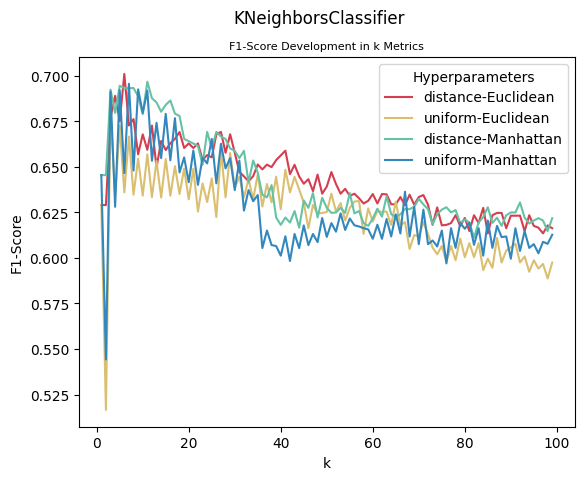

In [97]:
plot_acc_knn(1, 100)

Distance-based weighing yields the highest F1-score when combined with Euclidean distance. As can be seen, the Euclidean distance combination outperforms the other hyperparameters for at least two-thirds of the neighbor range. Furthermore, distance weighing dominates, largely uniform. Moreover, the uniform-Euclidean combination reaches its maximum F1-score at three neighbors, distance-Euclidean at six neighbors, uniform-Manhattan at seven neighbors, and distance-Manhattan at 11 neighbors, beyond which the F1-score is not further improved by more neighbors. It is also important to note that the peak F1-scores of distance-Euclidean, distance-Manhattan and uniform-Manhattan occur in close proximity to one another.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">6.3 - Decision Tree</p>

In [98]:
def plot_acc_dt(params_dict, optimizer):
    f1s = []
    criterions = ["entropy",
                  "gini"]
    colors = ["#d53e4f",
              "#abdda4"]

    optimizer_key = list(params_dict[optimizer].keys())[0]
    optimizer_values = list(params_dict[optimizer].values())[0]

    for criterion in criterions:
        f1 = []
        for optimizer_value in optimizer_values:
            clf_params = {"criterion": criterion,
                          "random_state": 42}
            clf_params[optimizer_key] = optimizer_value
            clf = DecisionTreeClassifier(**clf_params)
            clf.fit(X_train_sc, y_train)
            f1.append(f1_score(y_test, clf.predict(X_test_sc)))
        f1s.append(f1)

    print(f"|{'Criterion':^11}|{'Maximum F1-Score':^18}|{optimizer:^11}|")
    print(f"--------------------------------------------")
    for criterion, f1, color in zip(criterions, f1s, colors):
        print(f"|{criterion.title():^11}|{round(f1[np.argmax(f1)], 4):^18}|{round(optimizer_values[np.argmax(f1)], 4):^11}|")
        plt.plot(optimizer_values,
                 f1,
                 label = criterion.title(),
                 color = color)

    plt.xlabel(optimizer)
    plt.ylabel("F1-Score")
    plt.title(f"F1-Score Development in {optimizer} Metrics",
              fontsize = 8)
    plt.suptitle("DecisionTreeClassifier")        
    plt.legend(title = "Criterion");

    return

| Criterion | Maximum F1-Score | Max Depth |
--------------------------------------------
|  Entropy  |      0.7404      |     4     |
|   Gini    |      0.7398      |     4     |


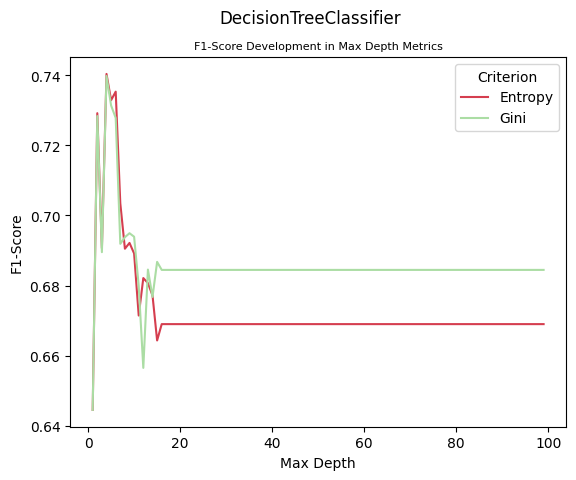

In [99]:
params_dict = {"Max Depth": {"max_depth": np.arange(1, 100, 1).tolist()},
               "CCP Alpha": {"ccp_alpha": np.arange(0, 0.06, 0.0001).tolist()}}
plot_acc_dt(params_dict, "Max Depth")

With maximum DT depth optimization, the entropy criterion yields the highest F1-score. For the most part, Entropy and Gini are in a comparable F1-score range, or alternate in dominance, until a depth of 16 at which they both become constant and Gini takes precedence over Entropy. As depths exceed four, the F1-score ceases to increase with depth. Furthermore, it should be noted that the peak F1-scores for Entropy and Gini fall within a relatively similar range.

| Criterion | Maximum F1-Score | CCP Alpha |
--------------------------------------------
|  Entropy  |      0.742       |  0.0064   |
|   Gini    |      0.7363      |  0.0084   |


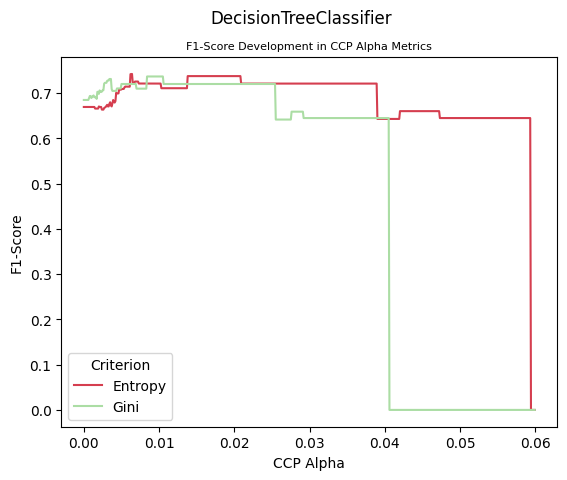

In [100]:
plot_acc_dt(params_dict, "CCP Alpha")

In minimal cost pruning, it is found that the highest F1-score is achieved with the Entropy criterion. The curve shapes of both criteria resemble one another, with the difference being that Entropy exhibits a rightward shift. Therefore, dominance ratios alternate, with a greater tendency towards Entropy, since the periodicity intervals are longer. As CCP alpha approaches 0.0084 for the Gini Criterion and 0.0064 for Entropy, further increases in CCP alpha do not result in an increase in F1-scores. Moreover, the peak F1-scores of both criteria are somewhat similar.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">6.4 - SVM</p>

In [101]:
def plot_acc_svm(params_dict, kernel):
    f1s = []
    colors = ["#9e0142",
              "#d53e4f",
              "#f46d43",
              "#d3904d",
              "#dbbf70",
              "#e6f598",
              "#abdda4",
              "#66c2a5",
              "#3288bd",
              "#5e4fa2"]

    kernel_value = list(params_dict[kernel].values())[0]
    dg_key = list(params_dict[kernel].keys())[1]
    dg_values = list(params_dict[kernel].values())[1]
    c_values = list(params_dict[kernel].values())[2]

    for dg_value in dg_values:
        f1 = []
        for c_value in c_values:
            clf_params = {"kernel": kernel_value,
                          "C": c_value,
                          "tol": 1E-5}
            clf_params[dg_key] = dg_value
            clf = SVC(**clf_params)
            clf.fit(X_train_sc, y_train)
            f1.append(f1_score(y_test, clf.predict(X_test_sc)))
        f1s.append(f1)

    print(f"|{dg_key.title():^8}|{'C':^8}|{'Maximum F1-Score':^18}|")
    print(f"--------------------------------------")
    for i in range(0, len(f1s)):
        print(f"|{dg_values[i]:^8}|{round(c_values[np.argmax(f1s[i])], 4):^8}|{round(f1s[i][np.argmax(f1s[i])], 4):^18}|")
        plt.plot(c_values, 
                 f1s[i],
                 c = colors[i],
                 label = dg_values[i])
        
    plt.xlabel("C")
    plt.ylabel("F1-Score")
    plt.title(f"F1-Score Development in C Metrics",
              fontsize = 8)
    plt.legend(title = f"{dg_key.title()}")
    plt.suptitle(f"Support Vector Machine ({kernel})")     

    return

In [102]:
def plot_tt_acc_svm(params_dict, kernel):
    dg_train_f1s = []
    dg_test_f1s = []
    colors = ["#d53e4f",
              "#abdda4"]

    kernel_value = list(params_dict[kernel].values())[0]
    dg_key = list(params_dict[kernel].keys())[1]
    dg_values = list(params_dict[kernel].values())[1]
    c_values = list(params_dict[kernel].values())[2]

    for i in range(len(dg_values)):
        clf_params = {"kernel": kernel_value,
                      "C": c_values[i],
                      "tol": 1E-5}
        clf_params[dg_key] = dg_values[i]
        clf = SVC(**clf_params)
        clf.fit(X_train_sc, y_train)
        dg_train_f1s.append(f1_score(y_train, clf.predict(X_train_sc)))
        dg_test_f1s.append(f1_score(y_test, clf.predict(X_test_sc)))

    print(f"|{dg_key.title():^8}|{'C':^8}|{'Train F1-Score':^16}|{'Test F1-Score':^15}|{'F1-Score Difference':^21}|")
    print(f"--------------------------------------------------------------------------")
    for j in range(0, len(dg_train_f1s)):
        print(f"|{dg_values[j]:^8}|{c_values[j]:^8}|{round(dg_train_f1s[j], 4):^16}|{round(dg_test_f1s[j], 4):^15}|{round(dg_train_f1s[j] - dg_test_f1s[j], 4):^21}|")

    for f1_type, label, color in zip([dg_train_f1s, dg_test_f1s], ["Train", "Test"], colors):
        plt.plot(dg_values,
                 f1_type,
                 label = label,
                 c = color)
        
    plt.xlabel(f"{dg_key.title()}")
    plt.ylabel("F1-Score")
    plt.title(f"F1-Score Development in {dg_key.title()} Metrics",
              fontsize = 8)
    plt.legend(title = "F1-Score Type")
    plt.suptitle(f"Support Vector Machine ({kernel})") 

    return

| Degree |   C    | Maximum F1-Score |
--------------------------------------
|   2    | 0.0101 |      0.6805      |
|   3    | 0.0201 |      0.6799      |
|   4    |  44.0  |      0.689       |
|   5    | 0.0601 |      0.6835      |
|   6    | 0.0101 |      0.6821      |
|   7    | 0.0301 |      0.6869      |
|   8    | 0.0101 |      0.6799      |
|   9    | 0.0201 |      0.6853      |
|   10   | 0.0101 |      0.6776      |
|   11   | 0.0101 |      0.6837      |


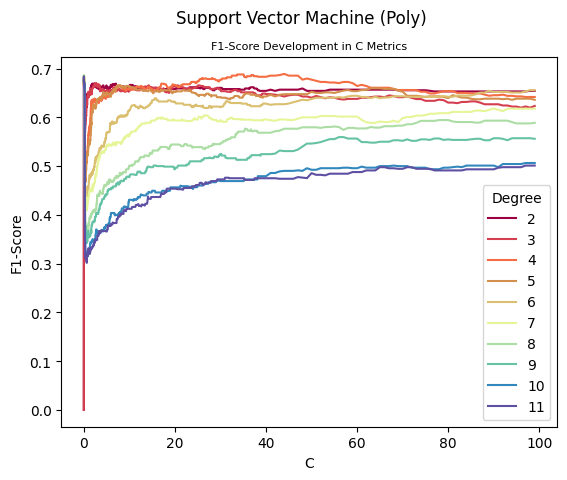

In [103]:
range1 = np.arange(0.0001, 10, 0.01)
range2 = np.arange(10, 40, 0.1)
range3 = np.arange(40, 100, 1)
C = np.concatenate((range1, range2, range3))

params_dict = {"Poly": {"kernel": "poly", 
                        "degree": [*range(2, 12)],
                        "C": C.tolist()}}

plot_acc_svm(params_dict, "Poly")

The kernel "poly" of SVMs, yields the highest F1-score with degree four. Among the C range, degree four dominates the other degrees for half of the range, whereas dominance ratios for the other half vary considerably, with the exception of degree two, retaining a dominant position throughout. F1-scores do not increase with additional C after degrees two, six, eight, 10, and 11 reach 0.0101, degree three and nine 0.0201, degree seven 0.0301, degree five 0.0601, and degree four 44. A further observation is that all degrees mentioned above, except 10, exhibit similar peak F1-score ranges.

| Degree |   C    | Train F1-Score | Test F1-Score | F1-Score Difference |
--------------------------------------------------------------------------
|   2    | 0.0101 |     0.6816     |    0.6805     |       0.0011        |
|   3    | 0.0201 |     0.6872     |    0.6799     |       0.0073        |
|   4    |   44   |     0.9341     |     0.689     |       0.2451        |
|   5    | 0.0601 |     0.7164     |    0.6835     |        0.033        |
|   6    | 0.0101 |     0.6961     |    0.6821     |       0.0141        |
|   7    | 0.0301 |     0.7072     |    0.6869     |       0.0203        |
|   8    | 0.0101 |     0.7004     |    0.6799     |       0.0205        |
|   9    | 0.0201 |     0.7097     |    0.6853     |       0.0244        |
|   10   | 0.0101 |     0.7082     |    0.6776     |       0.0307        |
|   11   | 0.0101 |     0.7093     |    0.6837     |       0.0257        |


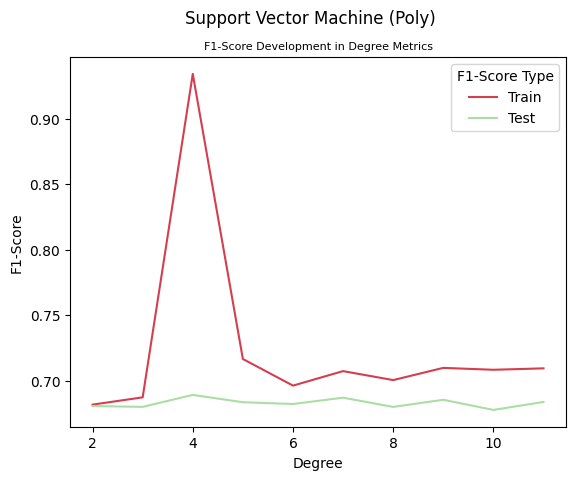

In [104]:
params_dict = {"Poly": {"kernel": "poly", 
                        "degree": [*range(2, 12)],
                        "C": [0.0101, 0.0201, 44, 0.0601, 0.0101, 0.0301, 0.0101, 0.0201, 0.0101, 0.0101]}}
plot_tt_acc_svm(params_dict, "Poly")

Given that SVMs within a nested-cross validation are subject to long runtimes, a second validation curve is plotted. The validation curve serves as an indicator of overfitting or underfitting tendencies. As both lead to a lack of generalizability, nested cross-validation would yield weak F1-scores due to the multitude of random states with multiple folds. Accordingly, such hyperparameters prone to overfitting or underfitting may allow further exclusion.

All degrees except four exhibit low variances, as their test F1-score is in close proximity to their training F1-score by a margin of less than 5%. In contrast, degree four has a high variance, with a margin of well above 10%. Yet, the bias across all degrees is small, as both F1-scores are significantly above the baseline's F1-score, with a margin of close to 20%.

| Gamma  |   C    | Maximum F1-Score |
--------------------------------------
| 0.0001 |  50.0  |      0.6162      |
| 0.001  |  91.0  |      0.6654      |
|  0.01  |  39.2  |      0.7381      |
|  0.1   | 2.0001 |      0.7434      |
|   1    | 1.0301 |      0.7259      |
|   10   | 1.0101 |      0.045       |


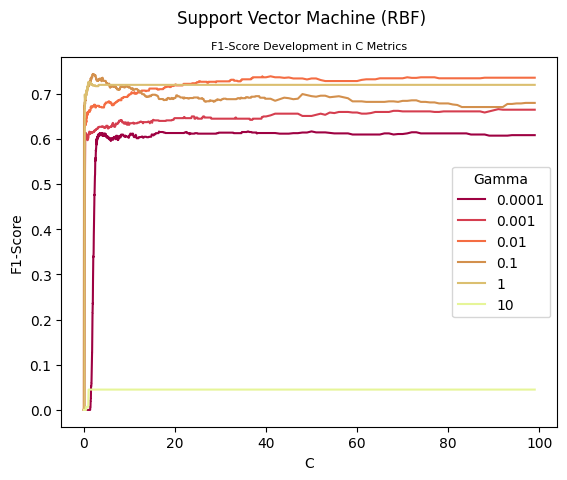

In [105]:
params_dict = {"RBF": {"kernel": "rbf",
                       "gamma": [0.0001, 0.001, 0.01, 0.1, 1, 10],
                       "C": C.tolist()}}

plot_acc_svm(params_dict, "RBF")

The RBF-based SVM with a gamma value of 0.1 achieved the highest F1-score. However, gamma 0.01 dominates at least two thirds of the C range. Further, it is evident that from gamma 0.01 downwards, F1-scores increase with larger C, reaching C 50 for gamma 0.0001, C 91 for gamma 0.001, and C 39.2 for gamma 0.01. Conversely, from gamma 0.1 upwards, F1-scores tend to increase with smaller C, i.e. C 2.0001 for gamma 0.1, C 1.0301 for gamma 1, and C 1.101 for gamma 10, posing the peak. Note that both turn points exhibit the highest peak F1 scores, close in proximity. Both gammas are to be examined in greater detail.

| Gamma  |   C    | Maximum F1-Score |
--------------------------------------
| 0.005  |  98.0  |      0.7224      |
|  0.01  |  39.2  |      0.7381      |
|  0.05  | 4.9901 |      0.738       |
|  0.1   | 2.0001 |      0.7434      |
|  0.15  | 1.4201 |      0.7487      |
|  0.2   | 1.0001 |      0.7647      |
|  0.25  | 0.9101 |      0.764       |
|  0.3   | 0.8201 |      0.7567      |
|  0.35  | 0.7701 |      0.748       |


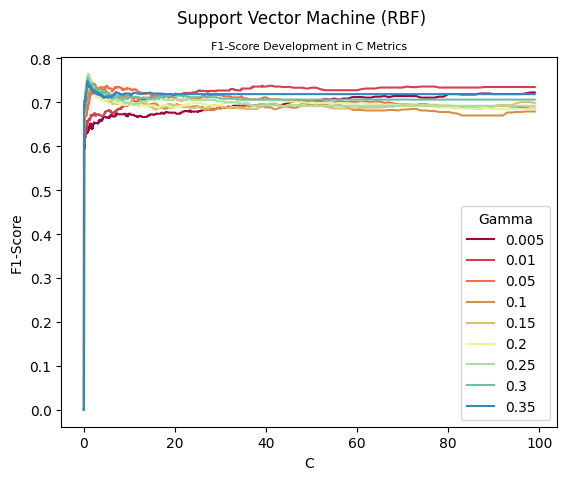

In [106]:
params_dict = {"RBF": {"kernel": "rbf",
                       "gamma": [0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35],
                       "C": C.tolist()}}
plot_acc_svm(params_dict, "RBF")

Among RBF-based SVMs, the F1-score with a gamma value of 0.2 was the highest. Nonetheless, gamma 0.01 continues to dominate at least two thirds of the C range. In addition, it appears that from gamma 0.05 downwards, F1-scores increase with larger C, reaching C 4.9901 for gamma 0.05, C 39.2 for gamma 0.01, and C 98 for gamma 0.005. Conversely, for gamma 0.1 and upwards, F1-scores still tend to increase with smaller C, i.e. C 2.0001 for gamma 0.1, C 1.4201 for gamma 0.15, C 1.0001 for gamma 0.2, C 0.9101 for gamma 0.25, C 0.8201 for gamma 0.3, and C 0.7701 for gamma 0.35, posing the peak. In this case, however, contrary to previous observations, rather than both turnpoints, gamma 0.2 and 0.25 appear to be the highest points, adjacent to one another.

| Gamma  |   C    | Train F1-Score | Test F1-Score | F1-Score Difference |
--------------------------------------------------------------------------
| 0.005  |   98   |     0.7452     |    0.7224     |       0.0228        |
|  0.01  |  39.2  |     0.7604     |    0.7381     |       0.0223        |
|  0.05  | 4.9901 |     0.8273     |     0.738     |       0.0893        |
|  0.1   | 2.0001 |     0.8492     |    0.7434     |       0.1058        |
|  0.15  | 1.4201 |     0.8718     |    0.7487     |       0.1231        |
|  0.2   | 1.0001 |     0.875      |    0.7647     |       0.1103        |
|  0.25  | 0.9101 |     0.8946     |     0.764     |       0.1306        |
|  0.3   | 0.8201 |     0.9098     |    0.7567     |       0.1531        |
|  0.35  | 0.7701 |     0.9203     |     0.748     |       0.1723        |


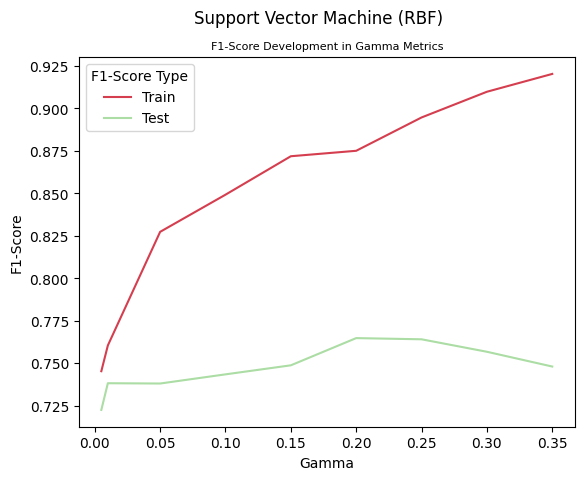

In [107]:
params_dict = {"RBF": {"kernel": "rbf", 
                        "gamma": [0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35],
                        "C": [98, 39.2, 4.9901, 2.0001, 1.4201, 1.0001, 0.9101, 0.8201, 0.7701]}}
plot_tt_acc_svm(params_dict, "RBF")

Gamma 0.005 and 0.01 demonstrate low variances, since their test F1-score is close to their training F1-score within a margin of less than 5%. Furthermore, gamma 0.05 and 0.1 exhibit moderate variance with a margin of about 10%. Moreover, gammas of 0.15, 0.2, 0.25, 0.3, and 0.35 show high variance as evident by a margin greater than 10%. Even so, the bias across all gammas appears to be small, as both F1-scores exceed by more than 20% the baseline's F1-score.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">6.4 - Grid Definition</p>

In [108]:
distance_knn_grid = {"estimator__weights": ["distance"],
                     "estimator__metric": ["euclidean", "manhattan"],
                     "estimator__n_neighbors": np.arange(3, 19, 1).tolist()}
md_tree_grid = {"estimator__criterion": ["entropy", "gini"],
                "estimator__max_depth": [*range(2, 11)]}
ccp_tree_grid = {"estimator__criterion": ["entropy", "gini"],
                 "estimator__ccp_alpha": np.arange(0.0055, 0.028, 0.0025).tolist()}
poly_grid = {"estimator__C": np.arange(0.0001, 0.0801, 0.01).tolist(),
             "estimator__degree": [2, 3, 5, 6, 7, 8, 9, 11]}
rbf_grid = {"estimator__C": np.arange(10, 90, 10).tolist(),
            "estimator__gamma": np.arange(0.007, 0.022, 0.003).tolist()}

In kNN, distance-based weighing yields generally a higher F1-score compared to uniform weighing. Moreover, Euclidean and Manhattan dominance ratios alternate across the k range. Therefore, Euclidean and Manhattan metrics as well as distance-based weighing are employed. These hyperparameters tend to have higher F1-score with fewer k. Thus, k is chosen to be lower, while beeing centered around the peak F1-scores. This includes neighbor populations in the range of three to eighteen.

For DT, Entropy and Gini exhibit comparable behavior in F1-scores. Hence, no substantive decision regarding disqualification can be made, which is why both Gini's and Entropy's criteria are employed. It should also be noted that the two methods of optimization, maximum depth and minimum cost pruning, give approximately similar results, preventing meaningful conclusions from being drawn. Therefore, both of them are included in the grid as separate estimators. These methods tend to have higher F1-scores with lower maximum depth or CCP alpha. As such, the composition resembles kNN, in the sense that it is of lower value and centered around peak F1-scores. With respect to minimum cost pruning, CCP alpha ranges between 0.0055 and 0.0255, included in the grid as steps of 0.0025.  While the counterpart, maximum depth, extends from two to 10.

Polynominal-based SVMs yield continuously high F1-scores from degrees two through eleven, yet with the exception of degree ten. Degree four, however, shows overfitting tendencies due to its high variance. As a result, degrees four and 10 are rejected, while the remainder is being added due to its high peak F1-scores and good variance bias trade-off. These remaining degrees tend to yield better F1-scores with smaller Cs. In this grid, those small Cs are centered around the optimal Cs for the remaining degrees. Thus, the C values selected range from 0.0001 to 0.0701 in increments of 0.01.

As has been observed for radial-based SVMs, smaller gamma values tend to have better F1-scores, particularly around gamma 0.01 and 0.1. However, within such surrounding areas, values exceeding gamma 0.01 exhibit moderate variance up to gamma 0.15 with high variance beyond that, indicative of overfitting. Thus, gammas in the range 0.007 to 0.019 in steps of 0.003 are chosen, given their relatively high peak F1-scores and favorable bias variance trade-off. The remaining gammas tend to yield higher F1-scores with greater C. These large Cs are similar to those for the polynominal kernel centered around the optimal Cs of the remaining gammas. Thus, in order to accommodate these optimum ranges within the grid, C values were selected in increments of 10 from 10 to 80.

Please note that relative expressions, such as low or high, pertain to the scope of the validation curves employed.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 7 - Nested Cross Validation</p>

The following code block, subjects the user feedback signal observations to a nested cross validation, in accordance with the previously defined grid. Resulting quality metrics are then evaluated, giving rise to a classification algorithm for production.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">7.1 - Execution</p>

In [109]:
def get_pipe(estimator):
    return Pipeline([("scaler", StandardScaler()), 
                     ("estimator", estimator)])

In [110]:
def add_results(identifier, results, f1, precision, recall, acc, fit_times, test_times):
    row = {"identifier": identifier,
           "f1_mean": f1.mean(),
           "f1_std": f1.std(),
           "precision_mean": precision.mean(),
           "precision_std": precision.std(),
           "recall_mean": recall.mean(),
           "recall_std": recall.std(),
           "acc_mean" : acc.mean(),
           "acc_std" : acc.std(),
           "fit_mean" : fit_times.mean(),
           "test_mean" : test_times.mean()}
    
    return pd.concat([results,
                      pd.DataFrame([row])],
                      ignore_index = True)

In [111]:
def nested_cv(identifier, results, estimator, grid, features, targets):
    NUM_TRIALS = 10
    NUM_INNER_REPEAT = 10
    NUM_INNER_SPLITS = 10
    NUM_OUTER_SPLITS = 10

    start = time.time()
    f1 = np.zeros((NUM_TRIALS, NUM_OUTER_SPLITS))
    precision = np.zeros((NUM_TRIALS, NUM_OUTER_SPLITS))
    recall = np.zeros((NUM_TRIALS, NUM_OUTER_SPLITS))
    acc = np.zeros((NUM_TRIALS, NUM_OUTER_SPLITS))
    fit_times = np.zeros((NUM_TRIALS, NUM_OUTER_SPLITS))
    test_times = np.zeros((NUM_TRIALS, NUM_OUTER_SPLITS))

    for i in range(NUM_TRIALS):
        print(f"Running Outer CV in iteration {i} at {round(time.time() - start, 2)} seconds")
        pipe = get_pipe(estimator)
        inner_cv = RepeatedStratifiedKFold(n_splits = NUM_INNER_SPLITS,
                                           n_repeats = NUM_INNER_REPEAT,
                                           random_state = i)
        outer_cv = StratifiedKFold(n_splits = NUM_OUTER_SPLITS,
                                   shuffle = True,
                                   random_state = i)
        clf = GridSearchCV(estimator = pipe,
                           param_grid = grid,
                           cv = inner_cv,
                           scoring = ("f1"),
                           n_jobs = 8,
                           refit = "f1")
        cv_results = cross_validate(clf,
                                    X = features,
                                    y = targets,
                                    cv = outer_cv,
                                    scoring = ("f1", 
                                               "precision", 
                                               "recall", 
                                               "accuracy"),
                                    n_jobs = 8)
        
        f1[i] = cv_results["test_f1"]
        precision[i] = cv_results["test_precision"]
        recall[i] = cv_results["test_recall"]
        acc[i] = cv_results["test_accuracy"]
        fit_times[i] = cv_results["fit_time"]
        test_times[i] = cv_results["score_time"]
        
    print("total time: ", round(time.time() - start, 2))

    return add_results(identifier = identifier, 
                       results = results,
                       f1 = f1,
                       precision = precision,
                       recall = recall,
                       acc = acc, 
                       fit_times = fit_times, 
                       test_times = test_times)

In [121]:
def cv_baseline(features, targets, results):
    NUM_TRIALS = 10
    NUM_SPLITS = 10

    start = time.time()
    f1 = np.zeros((NUM_TRIALS, NUM_SPLITS))
    precision = np.zeros((NUM_TRIALS, NUM_SPLITS))
    recall = np.zeros((NUM_TRIALS, NUM_SPLITS))
    acc = np.zeros((NUM_TRIALS, NUM_SPLITS))
    fit_times = np.zeros((NUM_TRIALS, NUM_SPLITS))
    test_times = np.zeros((NUM_TRIALS, NUM_SPLITS))

    for i in range(NUM_TRIALS):
        print(f"Running Outer CV in iteration {i} at {round(time.time() - start, 2)} seconds")
        clf = DummyClassifier(strategy = "uniform",
                              random_state = i)
        cv_results = cross_validate(estimator = clf,
                                    X = features,
                                    y = targets,
                                    cv = NUM_SPLITS,
                                    scoring = ("f1", 
                                               "precision", 
                                               "recall", 
                                               "accuracy"),
                                    n_jobs = 8)
        
        f1[i] = cv_results["test_f1"]
        precision[i] = cv_results["test_precision"]
        recall[i] = cv_results["test_recall"]
        acc[i] = cv_results["test_accuracy"]
        fit_times[i] = cv_results["fit_time"]
        test_times[i] = cv_results["score_time"]

    print("total time: ", round(time.time() - start, 2))
        
    return add_results(identifier = "uniform_baseline", 
                       results = results,
                       f1 = f1,
                       precision = precision,
                       recall = recall,
                       acc = acc, 
                       fit_times = fit_times, 
                       test_times = test_times)

In [113]:
results = pd.DataFrame()
identifiers = ["distance_kNN",
               "md_tree", 
               "ccp_tree", 
               "poly_svm", 
               "rbf_svm"]
estimators = [KNeighborsClassifier(), 
              DecisionTreeClassifier(random_state = 42),
              DecisionTreeClassifier(random_state = 42),
              SVC(kernel = "poly"),
              SVC(kernel = "rbf")]
grids = [distance_knn_grid, 
         md_tree_grid, 
         ccp_tree_grid, 
         poly_grid,
         rbf_grid]

for i in range(0, len(estimators)):
    print(f"Estimator: {identifiers[i]}")
    results = nested_cv(identifiers[i], results, estimators[i], grids[i], X, y)
    print(f"\n")

Estimator: distance_kNN
Running Outer CV in iteration 0 at 0.0 seconds
Running Outer CV in iteration 1 at 174.2 seconds
Running Outer CV in iteration 2 at 336.55 seconds
Running Outer CV in iteration 3 at 499.2 seconds
Running Outer CV in iteration 4 at 661.69 seconds
Running Outer CV in iteration 5 at 825.32 seconds
Running Outer CV in iteration 6 at 988.52 seconds
Running Outer CV in iteration 7 at 1151.28 seconds
Running Outer CV in iteration 8 at 1313.55 seconds
Running Outer CV in iteration 9 at 1476.54 seconds
total time:  1639.79


Estimator: md_tree
Running Outer CV in iteration 0 at 0.0 seconds
Running Outer CV in iteration 1 at 85.29 seconds
Running Outer CV in iteration 2 at 170.4 seconds
Running Outer CV in iteration 3 at 255.77 seconds
Running Outer CV in iteration 4 at 341.44 seconds
Running Outer CV in iteration 5 at 426.5 seconds
Running Outer CV in iteration 6 at 511.63 seconds
Running Outer CV in iteration 7 at 597.35 seconds
Running Outer CV in iteration 8 at 682.74 

In [122]:
results = cv_baseline(X, y, results)

Running Outer CV in iteration 0 at 0.0 seconds
Running Outer CV in iteration 1 at 0.04 seconds
Running Outer CV in iteration 2 at 0.08 seconds
Running Outer CV in iteration 3 at 0.12 seconds
Running Outer CV in iteration 4 at 0.16 seconds
Running Outer CV in iteration 5 at 0.19 seconds
Running Outer CV in iteration 6 at 0.23 seconds
Running Outer CV in iteration 7 at 0.27 seconds
Running Outer CV in iteration 8 at 0.31 seconds
Running Outer CV in iteration 9 at 0.35 seconds
total time:  0.39


It is crucial to note that tuning hyperparameters with the same data as for evaluation may introduce an optimistic bias in the model's evaluation, as the model absorbs information from the test data, leading to a leak. Therefore, real-world predictions are deteriorated due to overfitting. For this reason, nested cross validation is employed, giving an estimate of generalization error. Thereby, the rule of thumb of ten inner folds and ten outer folds is followed. As a further precaution against local estimation caused by a random state, outer and inner loops are repeated ten times each, with a limit of ten to prevent excessive runtimes.

Hyperparameter choices for estimator refitting, in "GridSearchCV", rely on the F1-score, for reasons mentioned in chapter 5.3. The estimator in question is subsequently cross-validated in quality by the F1-score, its composing factors (precision and recall) as well as accuracy. Accuracy as a comparator was selected, due to the well-balanced nature of the user feedback signals, limiting the value of balanced accuracy and area under the receiver operator characteristics curve. These metrics are subjected to descriptive statistics, including mean and standard deviation, along with training and prediction durations, allowing for a comprehensive evaluation of performance.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">7.2 - Performance</p>

In [123]:
results.sort_values(by = "f1_mean",
                    ascending = False,
                    ignore_index = True)

,identifier,f1_mean,f1_std,precision_mean,precision_std,recall_mean,recall_std,acc_mean,acc_std,fit_mean,test_mean
0,md_tree,0.733286,0.032163,0.691638,0.033595,0.783939,0.059774,0.715993,0.032036,54.688006,0.046931
1,rbf_svm,0.719706,0.030738,0.765990,0.035665,0.680202,0.041677,0.735763,0.027495,929.007625,0.215359
2,ccp_tree,0.711751,0.032820,0.696325,0.038694,0.732929,0.064904,0.704695,0.030526,77.697765,0.047595
3,distance_kNN,0.692338,0.038972,0.772616,0.042231,0.628586,0.046175,0.721540,0.033152,100.794229,0.064865
4,poly_svm,0.682948,0.025810,0.608886,0.062587,0.800101,0.107283,0.629423,0.053472,952.854560,0.086956
5,uniform_baseline,0.520638,0.037689,0.527230,0.029416,0.515152,0.048443,0.527649,0.028818,0.001719,0.011782


Each of the complex models, as measured by means of the F1-score and accuracy, outperforms the uniform baseline. Across complex models, the mean F1-score falls within the range of 0.6829 and 0.7333. Maximum depth optimized DTs reflect the upper bound, whereas polynomial-based SVMs capture the lower bound. While radial-based SVMs, exhibiting performance close to minimum cost pruned DTs, settle in the upper midfield and kNNs within the lower midfield.

The range of the comparative metric accuracy, however, is significantly greater, lying between 0.6294 and 0.7358. Polynomial-based SVMs constitute yet again the lower bound, whereas radial-based SVMs establish the upper bound, with kNNs and DTs all adjacent to the upper bound.

Considering the standard deviations of the F1-scores, all complex models except for kNNs outperform the uniform baseline. Thus, the range of standard deviations of complex models lies between 0.039 (slightly above the uniform baseline) and 0.0258. Hence, kNNs form the upper bound and polynomial-based SVMs the lower bound, as the remainder occupy the midfield.

However, when viewing standard deviations of accuracy, kNNs, DTs and polynominal-based SVMs fall short compared to the uniform baseline. As a consequence, standard deviations of complex models range from 0.0535 with polynominal-based SVMs as the upper bound to 0.0275 with radial-based SVMs as the lower bound. All other complex models revolve around the upper bound. Note, however, that the upper bound scrapes the uniform baseline.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">7.3 - Recommendation</p>

The F1-score quality metric suggests maximum depth-optimized DTs. With radial-based SVMs and cost-optimized DTs, there are, however, two competitors that merit further consideration. Radial-based SVMs demonstrate smaller standard deviations in F1-score and accuracy, while exhibiting higher accuracy means. Although this argument may seem convincing, it is invalidated by the comparative four times higher prediction time, as users tend to expect a rapid, seamless experience in interaction with music recommenders. Cost optimized DTs are on the other hand inferior across all metrics with the exception of recall, a subcomponent of the F1-score, however negligible and therefore not worth considering.

Yet, asymmetry is evident within the subcomponents of the F1-score of DTs optimized by maximum depth, with distance-based kNNs opposing such asymmetry, which may be worth reviewing as for domain demands. As for music recommenders, recommendations of beloved songs and omissions of incompatible songs take precedence, although there ought to be enough beloved songs to satisfy such needs. High recall is, therefore, of primary concern, although the precision-to-recall trade-off must remain within acceptable bounds. DTs with maximum depth optimizers align with such requirements, due to their high recall average and sufficient precision average, wherefore their counterparts distance-based kNNs fall short. It should be noted that the precision-to-recall trade-off of polynomial-based SVMs, exceeds acceptable bounds, leading to its neglect.

<center>

<b>Recommendation</b>

<em>Maximum Depth Optimized Decision Tree</em>

</center>

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 8 - Final Production Model</p>

This code block involves the creation of a production model to predict user preferences regarding songs. Thus, hyperparameters found to be optimal are obtained by cross-validation, with which a model is trained. The resultant model is then stored in a suitable format, ready for production.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">8.1 - Determination of Optimal Hyperparameters</p>

In [116]:
def train_prod_model(estimator, grid, features, targets):
    NUM_INNER_REPEAT = 10
    NUM_INNER_SPLITS = 10

    pipe = get_pipe(estimator)
    cv = RepeatedStratifiedKFold(n_splits = NUM_INNER_SPLITS,
                                 n_repeats = NUM_INNER_REPEAT,
                                 random_state = 42)
    clf = GridSearchCV(estimator = pipe,
                       param_grid = grid,
                       cv = cv,
                       n_jobs = 8)
    clf.fit(features, targets)
    print(clf.best_params_)

    return clf

In [117]:
clf = train_prod_model(DecisionTreeClassifier(random_state = 42), md_tree_grid, X, y)

{'estimator__criterion': 'gini', 'estimator__max_depth': 6}


The cross validation results indicate that a maximum depth of six, combined with Gini criteria, poses the optimal hyperparameters under the given grid. In light of these hyperparameters, a DT optimized for maximum depth is trained.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">8.2 - Model Storage</p>

In [118]:
joblib.dump(clf, "md_tree_clf.joblib")

['md_tree_clf.joblib']

After training, the model is saved as "md_tree_clf.joblib", thus allowing deployment within production environments.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 9 - Conclusion and Future Work</p>

Experimental results are based on nested cross-validated estimates, within the scope of a grid of estimators with hyperparameters, drawn from validation curves. These estimates served as the basis for decision-making, with respect to the optimal algorithm to be used to approach the classification problem. As such, the estimates pertain to an algorithm's ability to provide musical feature-driven, song recommendations. According to those estimates, SVMs proved insufficient, as radial-based kernels exhibited excessive prediction times, and polynomial-based kernels were faced with a precision-recall dilemma. Moreover, distance-based kNNs were found to demonstrate poor precision-recall dominance ratios, giving rise to DTs. In almost all estimates, maximum depth-optimized DTs outperformed minimum cost-optimized DTs. Thus, maximum depth optimized DTs employing Gini criteria and a maximum depth of six were deemed most appropriate.

As a result, given the average recall, 78.39% of the time, compatible songs will be recommended. While according to precision, an average of 69.16% of all compatible songs are considered such.

Such estimates rely on nested cross-validation to ensure generalizability, essential for real-world use. Confidence in generalizability depends on the number of folds and repetitions in the inner and outer loops. As there were resource constraints for computation, resulting in bounds for folds and repetitions, uncertainty is to be expected. The data supplied was subjected to feature engineering, dropping the feature "artist". Yet there may be certain inclinations for artists, prevailing over patterns and relationships within the musical features, causing errors. It should also be noted that all inclinations within the dataset originate from a single user. Considering that a single user may not be representative of the broader population, generalizability is limited.

However, recommendations can be given as to whether a particular piece of music resonates with that user, with an average F1-score of 73.33%. The result will be an improvement in user engagement and, as a consequence, a greater likelihood of retention. As such, the experiment served as a proof of concept, showcasing the feasibility and effectiveness of classification algorithms for recommending music. Even though this classifier was designed for a single user, this experiment may serve as a starting point for further research and adaptation to a wider population. Moreover, it may prove useful in selecting algorithms related to similar classification problems.

Future Work:
- data augmentation (by more song-related features)
- ensemble learning (voting, bagging, boosting)
- online learning (continuous adaption to counter concept drift)